<a href="https://colab.research.google.com/github/pav2345/crime-rate-prediction/blob/main/Copy_of_crime_prediction_with_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             nm_pol  murder  rape  gangrape  robbery  theft  assualt murders  \
161  G.T.B. ENCLAVE       1     1         0       13     86                6   
162    NEW USMANPUR       0     8         1       10    580                9   
163     SONIA VIHAR       6    25         1       25    300               42   
164   KARAWAL NAGAR       7    15         2       26    334               19   
165       GOKULPURI       2     6         2       22    306               19   

     sexual harassement      totarea  totalcrime      long       lat  \
161                   7  2874304.374         114  77.31600  28.68496   
162                   5  3093393.387         613  77.26207  28.67202   
163                   8  4453887.398         407  77.25611  28.71128   
164                   7  2937546.578         410  77.27450  28.73284   
165                   8  1566343.791         365  77.28085  28.70225   

     crime/area      area  
161   39.661770  2.874304  
162  198.164256  3.093393  
16

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

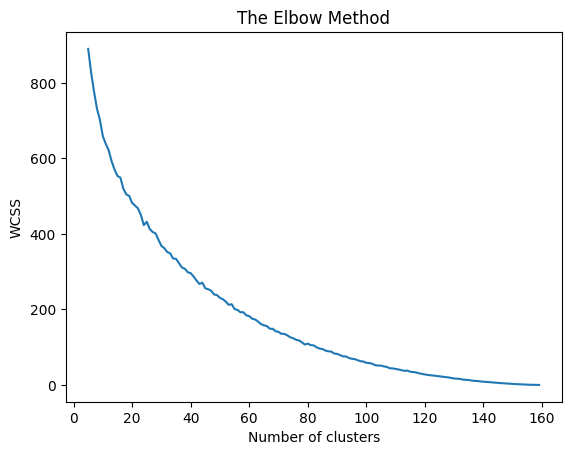

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


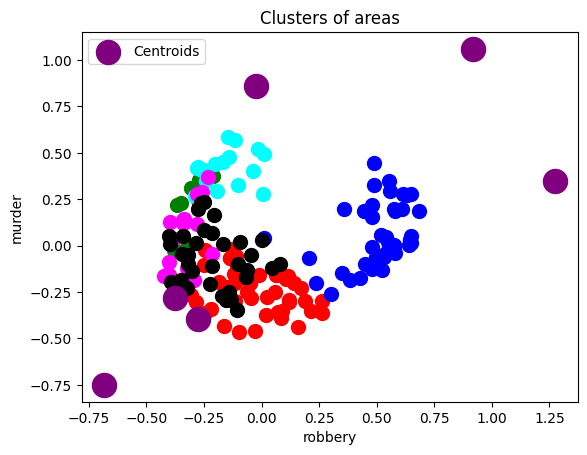

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/crime (1) (1).csv')
print(dataset.tail())
X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10]].values


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(5,160):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 24)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5,160), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta' )
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black' )



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'purple', label = 'Centroids')
plt.title('Clusters of areas')
plt.xlabel('robbery')
plt.ylabel('murder')
plt.legend()
plt.show()